# ADEM ALDEMIR


# Analytical Case Study 
## Risk Analytics, Technology, and Innovation



## Table of Contents
- **Introduction**
- **Data Munging**
- **Question 1**
- **Question 2**
- **Question 3**
- **Question 4**
- **Question 5**
- **Question 6**
- **Question 7**



## Introduction

This analysis mainly aims to determine which one of these clients without financial information, have actually over 5 million ₺ net sales. With this aspect, basic statistical analysis has been studied in the data munging part and questions have been answered in the following.

## Data Munging 
Data wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time. 

 * **Import data and python packages:** imports Python libraries and loads data files into DataFrames, 
 * **Cleaning Data:** analyses the amount of work that needs to be done and performs the steps necessary to make the data tidy and clean. 



### Import data and python packages
Before exploring the dataset, necessary modules are imported for the analysis. 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
% matplotlib inline

In this section, we are going to load and observe the DataFrame and catch some insights for the questions.

In [4]:
df = pd.read_excel("/data1.xlsm")

# preview data
df.head(10)

,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
0,2017,RATI9590GZD,36917,8.0,NaN,RETAIL-WHOLESALE,Marmara Region,70917.0,7000007.0,3
1,2015,RATI2539VHR,34389,21.0,32615.0,MANUFACTURING,Central Anatolia Region,682602.0,2354029.0,0
2,2010,RATI4481GNN,35089,7.0,282834.0,RETAIL-WHOLESALE,Mediterranean Region,115581.0,592922.0,0
3,2012,RATI4948THA,38084,34.0,35597.0,MANUFACTURING,Southeastern Anatolia Region,39334.0,2471021.0,1
4,2013,RATI8841WYZ,38831,15.0,134259.0,SERVICES,Aegean Region,71295.0,506238.0,0
5,2011,RATI6581GZV,39109,25.0,NaN,OTHERS,Marmara Region,524053.0,1225401.0,3
6,2017,RATI9051OKI,36693,8.0,6481.0,MANUFACTURING,Marmara Region,107145.0,873191.0,0
7,2012,RATI8817WSE,35878,13.0,NaN,MANUFACTURING,Eastern Anatolia Region,299797.0,701336.0,3
8,2014,RATI8420EUQ,40125,3.0,45293.0,MANUFACTURING,Mediterranean Region,1513099.0,2291052.0,0
9,2012,RATI7366ECM,38704,21.0,7825.0,RETAIL-WHOLESALE,Central Anatolia Region,355087.0,1512329.0,1


At first view, it seems that there is a clean dataset. 
* As in the case stated, the bank does not have current financial statements of each company that can be seen in the Profit column  as there are null values and in the Sales column, the value 3, indicates  that there is no information

* Also, we have some data quality issues in the establisment_date column because at the column name it says Date but when I look it indicates the establishment day since the company established.

In [5]:
df.shape

(11357, 10)

The Dataset includes 11K observations/rows and 10 colomns/features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11357 entries, 0 to 11356
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                11357 non-null  int64  
 1   Customer_num        11357 non-null  object 
 2   Establishment_Date  11357 non-null  int64  
 3   Number_of_Emp       10771 non-null  float64
 4   Profit              8526 non-null   float64
 5   Sector              11357 non-null  object 
 6   Region              10118 non-null  object 
 7   Total Risk          11192 non-null  float64
 8   Total Limit         11192 non-null  float64
 9   Sales               11357 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 887.4+ KB


* When I look at the info table, I see 11357 observations but some columns have less observations. So, there are some null values in the features which are Number_of_Emp, Profit, Region, Total Limit, Total Risk; I think, bank does not have these informations

* My other thought is companies may be newly opened so, There is no information about Total Risk and Total Limit.

In [7]:
df.describe()

,YEAR,Establishment_Date,Number_of_Emp,Profit,Total Risk,Total Limit,Sales
count,11357.000000,11357.000000,10771.000000,8.526000e+03,1.119200e+04,1.119200e+04,11357.000000
mean,2013.939421,37291.960729,16.611642,6.138343e+04,1.249427e+06,2.536513e+06,0.874791
std,2.216296,2828.828350,84.039303,4.084090e+05,4.356318e+07,1.862993e+07,1.267010
min,2010.000000,18.000000,1.000000,-1.828452e+07,0.000000e+00,2.831000e+03,0.000000
25%,2012.000000,35427.000000,4.000000,1.349725e+04,1.197878e+05,5.153302e+05,0.000000
50%,2014.000000,37804.000000,7.000000,4.505250e+04,3.953125e+05,1.291620e+06,0.000000
75%,2016.000000,39445.000000,16.000000,1.165898e+05,1.006619e+06,2.931796e+06,1.000000
max,2017.000000,42535.000000,3333.000000,3.724579e+06,4.602535e+09,1.894825e+09,3.000000


Summary statistics for numeric variables
* When I look at the YEAR column, oldest information comes from the year 2010, newest one is the year 2017 
* As I say, Establisment_Date doesnt indicate the dates, needs to be renamed; because, It can be number of days since company was founded or established.
* Profit's min value start from negative values that may be logical because it can not save money.
* Total Risk, Total Limit and Sales columns do not have any major problems.
* I'll rename the Total Risk and the Total Limit column names because they have blank character and it's not valid when observing with pandas  
* Sales feature needs to be converted to categorical from numeric data type and it needs one hot encoding because we don't want to misunderstood by our model.

In [8]:
df.Sector.value_counts()

RETAIL-WHOLESALE    5752
MANUFACTURING       2897
OTHERS              1798
SERVICES             910
Name: Sector, dtype: int64

In [9]:
df.Region.value_counts()

Marmara Region                  5166
Central Anatolia Region         1540
Aegean Region                   1212
Mediterranean Region            1129
Black Sea Region                 477
Southeastern Anatolia Region     398
Eastern Anatolia Region          196
Name: Region, dtype: int64

In [10]:
df.Sales.value_counts()

0    7084
3    2831
1    1442
Name: Sales, dtype: int64

Here, we have the distribution of categorical variables.
* When I look at the "Sector" column, Most companies(5752) work on the RETAIL-WHOLESALE sector in the Marmara region.
* I don't see any noisy or NaN value in Both Sector and Region features, so they seem to be very clean
* At the "Sales" column, Only 2831 observations do not have sales information, they need to be excluded before performing any predictive analysis. Because they can produce noisy insights to our models.

In [11]:
df.YEAR.value_counts()

2017    1767
2016    1724
2015    1604
2014    1527
2013    1394
2012    1294
2011    1129
2010     918
Name: YEAR, dtype: int64

* I just want to observe here "YEAR" column. 
I see, Old data exists in the dataset. Data which is older than a certain level may be considered to be excluded from dataset as a business perspective; because, data may lose its informative value. 

I am going to check Duplicated observations in below. 

In [12]:
df[df.iloc[:,1:2].duplicated()].head()

,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
100,2016,RATI9475NNY,36789,1.0,-52876.0,MANUFACTURING,Central Anatolia Region,58386.0,1503634.0,0
105,2013,RATI9475NNY,36792,1.0,-14572.0,MANUFACTURING,Central Anatolia Region,70887.0,1943044.0,0
134,2014,RATI9571DKB,36697,1.0,13361.0,MANUFACTURING,Central Anatolia Region,61918.0,435756.0,0
174,2010,RATI1077KXC,33455,NaN,NaN,RETAIL-WHOLESALE,Aegean Region,21417.0,1808611.0,3
198,2015,RATI7201XMY,38955,30.0,NaN,RETAIL-WHOLESALE,Aegean Region,144858.0,1980660.0,3


* It can be seen that there are duplicated CUSTOMER ID's. ID needs to be unique in terms of clients; clients' latest information could be extracted from data.

In [13]:
# check column names
df.columns

Index(['YEAR', 'Customer_num ', 'Establishment_Date', 'Number_of_Emp',
       'Profit', 'Sector', 'Region', 'Total Risk ', 'Total Limit', 'Sales'],
      dtype='object')

* Yess, It can be seen that there are problematic column names which have unnecessary blanks. 😬

## Question1

Do you think this data is suitable for modeling, if it is not, what improvements should be done?

It is, in general, suitable although some of the features look irrelevant such as customer identification number and establishment date. But, Features and target are clearly defined. However, following tidiness and quality issues that found from at the data munging part, is needed to be solved.
And, Historical sales of the companies would also be helpful since that would give an idea about the trend of the company. If there are other features that are related to the number of sales, that also would help to create a more robust model.

My improvements :

1. Labels should be renamed especially for 'Customer_num ', 'Total Risk ', 'Total Limit' and 'Establishment_Date' columns
2. There are duplicated customer ids. Data should be unique in terms of customer id; therefore, customers' latest information can be used for further analysis. So, I'll exclude the duplicated ID raws.
3. Sales column needs to be converted from integer to object format and observations which have value 3 in the Sales columns need to be excluded from dataset because they have no enough info.
* Missing values should be filled with mean or median and standardization should be applied before diving into modelling
* To use categorical data in the modeling, they are needed to be encoded with label encoder or One hot encoding but I'll choose One hot Encoding method.

I want to indicate that there are some points that needs to be considered.

* More information may be added into dataset such as payment amount to justify the balance of client or information about company's sector position or its culture that Mrs. Sevinç stated to find out the exception.




## Cleaning Data

In this section, I am going to define the problem which are listed in Question1, and then code the solutions, later test the code sequentialy.

In [14]:
df_new = df.copy()

#### Improvement (1)

Labels should be renamed especially for 'Customer_num ', 'Total Risk ', 'Total Limit' and 'Establishment_Date' columns.

#### Code

In [15]:
df_new = df_new.rename(columns={'Customer_num ' :'Customer_num',
                                    'Establishment_Date' : 'Establishment_Day',
                                    'Total Risk ':'Total_Risk',
                                    'Total Limit': 'Total_Limit'})

#### Test

In [16]:
df_new.columns

Index(['YEAR', 'Customer_num', 'Establishment_Day', 'Number_of_Emp', 'Profit',
       'Sector', 'Region', 'Total_Risk', 'Total_Limit', 'Sales'],
      dtype='object')

#### Improvement (2)

There are duplicated customer ids. Data should be unique in terms of customer id; therefore, customers' latest information can be used for further analysis. So, I'll exclude the duplicated ID raws.

#### Code

In [17]:
df_new = df_new.groupby('Customer_num', group_keys=False).apply(lambda x: x.loc[x.YEAR.idxmax()])

#### Test

In [18]:
df.loc[df['Customer_num '] == 'RATI9475NNY', ]

,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
25,2015,RATI9475NNY,36799,1.0,38313.0,MANUFACTURING,Central Anatolia Region,54008.0,1521978.0,0
100,2016,RATI9475NNY,36789,1.0,-52876.0,MANUFACTURING,Central Anatolia Region,58386.0,1503634.0,0
105,2013,RATI9475NNY,36792,1.0,-14572.0,MANUFACTURING,Central Anatolia Region,70887.0,1943044.0,0
1549,2014,RATI9475NNY,36791,1.0,NaN,MANUFACTURING,Central Anatolia Region,37175.0,1811846.0,3
4031,2011,RATI9475NNY,36807,1.0,28832.0,MANUFACTURING,Central Anatolia Region,394075.0,547229.0,0
6790,2010,RATI9475NNY,36811,1.0,22443.0,MANUFACTURING,Central Anatolia Region,159931.0,497849.0,0
11284,2012,RATI9475NNY,36803,1.0,15461.0,MANUFACTURING,Central Anatolia Region,67113.0,1919368.0,0


In [20]:
df_new.loc[df_new['Customer_num'] == 'RATI9475NNY', ]

,YEAR,Customer_num,Establishment_Day,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales
Customer_num,,,,,,,,,,
RATI9475NNY,2016,RATI9475NNY,36789,1.0,-52876.0,MANUFACTURING,Central Anatolia Region,58386.0,1503634.0,0


#### Improvement (3)

Sales column needs to be converted from object to integer format and observations which have value 3 in the Sales columns need to be excluded from dataset because they have no enough info. 

Not: In the raw data, Sales column is object type but I changed the column type in Excel. Later I load it to the notebook. But If you want to do it when you load the data directly to jupyter notebook, we should use below code.

#### Code

In [23]:
df_new.Sales.dtype

dtype('int64')

In [22]:
#df_new['Sales'] = df_new['Sales'].astype(int)

In [24]:
# remove value 3
df_new = df_new[df_new.Sales != 3]

#### Test

In [25]:
df_new.Sales.value_counts()

0    2412
1     634
Name: Sales, dtype: int64

## Question2

What is your opinion about Mr. Yılmaz’s assumption that “clients with more than 5 million risks in banking sector, also has over 5 million net sales”? Do you think this argument is statistically correct?

To answer this question, I need to employ logistic regression; because, each row is either having 5 Mio sales or not(binary). This is binary class classification problem. And Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

The goal is to use logistic to fit the regression model to see if there is a significant difference in sales based on client's risk amount. However, I first need to create a column for the intercept, and create a dummy variable column to indicate whether client has risk higher than 5 Mio. 

In [26]:
df_new['Risk'] = df_new['Total_Risk'] > 5000000

In [28]:
df_new['Risk'] = df_new['Risk'].map({True: 1, False: 0})

In [29]:
df_new

,YEAR,Customer_num,Establishment_Day,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales,Risk
Customer_num,,,,,,,,,,,
RATI1000EDC,2016,RATI1000EDC,40206,13.0,39846.0,RETAIL-WHOLESALE,Marmara Region,38795.0,722891.0,0,0
RATI1001HPF,2017,RATI1001HPF,33701,20.0,82182.0,OTHERS,Marmara Region,4603985.0,12112848.0,0,0
RATI1006ZUA,2017,RATI1006ZUA,38138,20.0,39176.0,SERVICES,Central Anatolia Region,669969.0,3429846.0,0,0
RATI1008FDC,2015,RATI1008FDC,40224,9.0,95724.0,RETAIL-WHOLESALE,Southeastern Anatolia Region,3288592.0,8237700.0,1,0
RATI1015EBB,2016,RATI1015EBB,36161,33.0,58446.0,MANUFACTURING,Marmara Region,216474.0,3325581.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
RATI9985VHY,2017,RATI9985VHY,41595,5.0,6469.0,SERVICES,NaN,71396.0,136252.0,0,0
RATI9986SGD,2010,RATI9986SGD,34707,NaN,35202.0,MANUFACTURING,Marmara Region,300138.0,533367.0,0,0
RATI9994RYM,2016,RATI9994RYM,36152,25.0,-593249.0,RETAIL-WHOLESALE,Central Anatolia Region,3274543.0,6574278.0,0,0


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3046 entries, RATI1000EDC to RATI9996WER
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               3046 non-null   int64  
 1   Customer_num       3046 non-null   object 
 2   Establishment_Day  3046 non-null   int64  
 3   Number_of_Emp      2954 non-null   float64
 4   Profit             3046 non-null   float64
 5   Sector             3046 non-null   object 
 6   Region             2769 non-null   object 
 7   Total_Risk         3019 non-null   float64
 8   Total_Limit        3019 non-null   float64
 9   Sales              3046 non-null   int64  
 10  Risk               3046 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 365.6+ KB


Also, still I have null values in the Total_Risk feature. I should remove these observations before establish the model.

In [31]:
df_new['intercept'] = 1

In [33]:
df_new.drop(df_new[df_new['Total_Risk'].notnull()== False].index,inplace=True)

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, RATI1000EDC to RATI9996WER
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               3019 non-null   int64  
 1   Customer_num       3019 non-null   object 
 2   Establishment_Day  3019 non-null   int64  
 3   Number_of_Emp      2930 non-null   float64
 4   Profit             3019 non-null   float64
 5   Sector             3019 non-null   object 
 6   Region             2750 non-null   object 
 7   Total_Risk         3019 non-null   float64
 8   Total_Limit        3019 non-null   float64
 9   Sales              3019 non-null   int64  
 10  Risk               3019 non-null   int64  
 11  intercept          3019 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 306.6+ KB


In the below cell, I observe that If customer has Risk or not and Annual Net Sales greater or less than 5M ₺ how many companies are there. We can comment out that 2342 companies has no risk but has no annual sales value is greater than 5M ₺. 

In [36]:
df_new.groupby(['Risk','Sales']).nunique()['Customer_num']

Risk  Sales
0     0        2342
      1         587
1     0          46
      1          44
Name: Customer_num, dtype: int64

In [37]:
df_new

,YEAR,Customer_num,Establishment_Day,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales,Risk,intercept
Customer_num,,,,,,,,,,,,
RATI1000EDC,2016,RATI1000EDC,40206,13.0,39846.0,RETAIL-WHOLESALE,Marmara Region,38795.0,722891.0,0,0,1
RATI1001HPF,2017,RATI1001HPF,33701,20.0,82182.0,OTHERS,Marmara Region,4603985.0,12112848.0,0,0,1
RATI1006ZUA,2017,RATI1006ZUA,38138,20.0,39176.0,SERVICES,Central Anatolia Region,669969.0,3429846.0,0,0,1
RATI1008FDC,2015,RATI1008FDC,40224,9.0,95724.0,RETAIL-WHOLESALE,Southeastern Anatolia Region,3288592.0,8237700.0,1,0,1
RATI1015EBB,2016,RATI1015EBB,36161,33.0,58446.0,MANUFACTURING,Marmara Region,216474.0,3325581.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
RATI9985VHY,2017,RATI9985VHY,41595,5.0,6469.0,SERVICES,NaN,71396.0,136252.0,0,0,1
RATI9986SGD,2010,RATI9986SGD,34707,NaN,35202.0,MANUFACTURING,Marmara Region,300138.0,533367.0,0,0,1
RATI9994RYM,2016,RATI9994RYM,36152,25.0,-593249.0,RETAIL-WHOLESALE,Central Anatolia Region,3274543.0,6574278.0,0,0,1


To look up the correlation between Sales and Risk column, I will feed my model just with below features.

In [39]:
logit1 = sm.Logit(df_new['Sales'],df_new[['intercept' ,'Risk']])
outputs1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.506692
         Iterations 5


In [40]:
outputs1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 3019
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 May 2021   Pseudo R-squ.:                 0.01161
Time:                        04:53:01   Log-Likelihood:                -1529.7
converged:                       True   LL-Null:                       -1547.7
Covariance Type:            nonrobust   LLR p-value:                 2.050e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3837      0.046    -29.978      0.000      -1.474      -1.293
Risk           1.3393      0.216      6.204      0.000       0.916       1.762
==============================================================================
"""

* There is strong statistical evidence to claim that clients with more than 5 million risks in banking sector, also has over 5 million net sales. (p-value less than 0.05)

* This means that for a one-unit increase in  Risk (in other words, going from having less than 5 mio risk to having greater than 5 Mio risk), we expect a 1.3393 increase in the log-odds of the dependent variable Sales(having greater than 5 mio sales), holding all other independent variables constant

## Question3

How do you calculate experience in sector of clients? Do you think this variable is related to net sales as Mrs. Sevinç stated?

Experience can be inferred from the date of establishment of the company (i.e., earlier the date, more the experience). As we mentioned in the 1st question, this "Establishment_Day" feature looks irrelevant but a more substantial analysis can be made by systematically analyzing the correlation between Establishment Day and the Net Sales.

Data includes the tenure of customer in terms of day. Like I have already done in the second question, we can do logistic regression to find out whether feature statistically important or not.

In [44]:
logit2 = sm.Logit(df_new['Sales'],df_new[['intercept' ,'Establishment_Day']])
outputs2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.508531
         Iterations 5


In [45]:
outputs2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 3019
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 May 2021   Pseudo R-squ.:                0.008019
Time:                        05:01:53   Log-Likelihood:                -1535.3
converged:                       True   LL-Null:                       -1547.7
Covariance Type:            nonrobust   LLR p-value:                 6.293e-07
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             1.4122      0.550      2.566      0.010       0.334       2.491
Establishment_Day -7.273e-05   1.46e-05     -4.979      0.000      -0.000   -4.41e-05
=====================================================================================
"""

Customer experience in terms of day information is statistically important; because, p-value is less than 0.05. For every one-unit increase in customer day tenure, we expect a 0,07273 decrease in the log-odds of Sales, holding all other independent variables constant. It means that when companies with more experience, they are less likely to have greater than 5 mio sales.

## Question4

How is your variables’ basic statistics and graphics (distributions, histograms etc.)? Do you observe any errors?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96b9df5f50>,
      dtype=object)

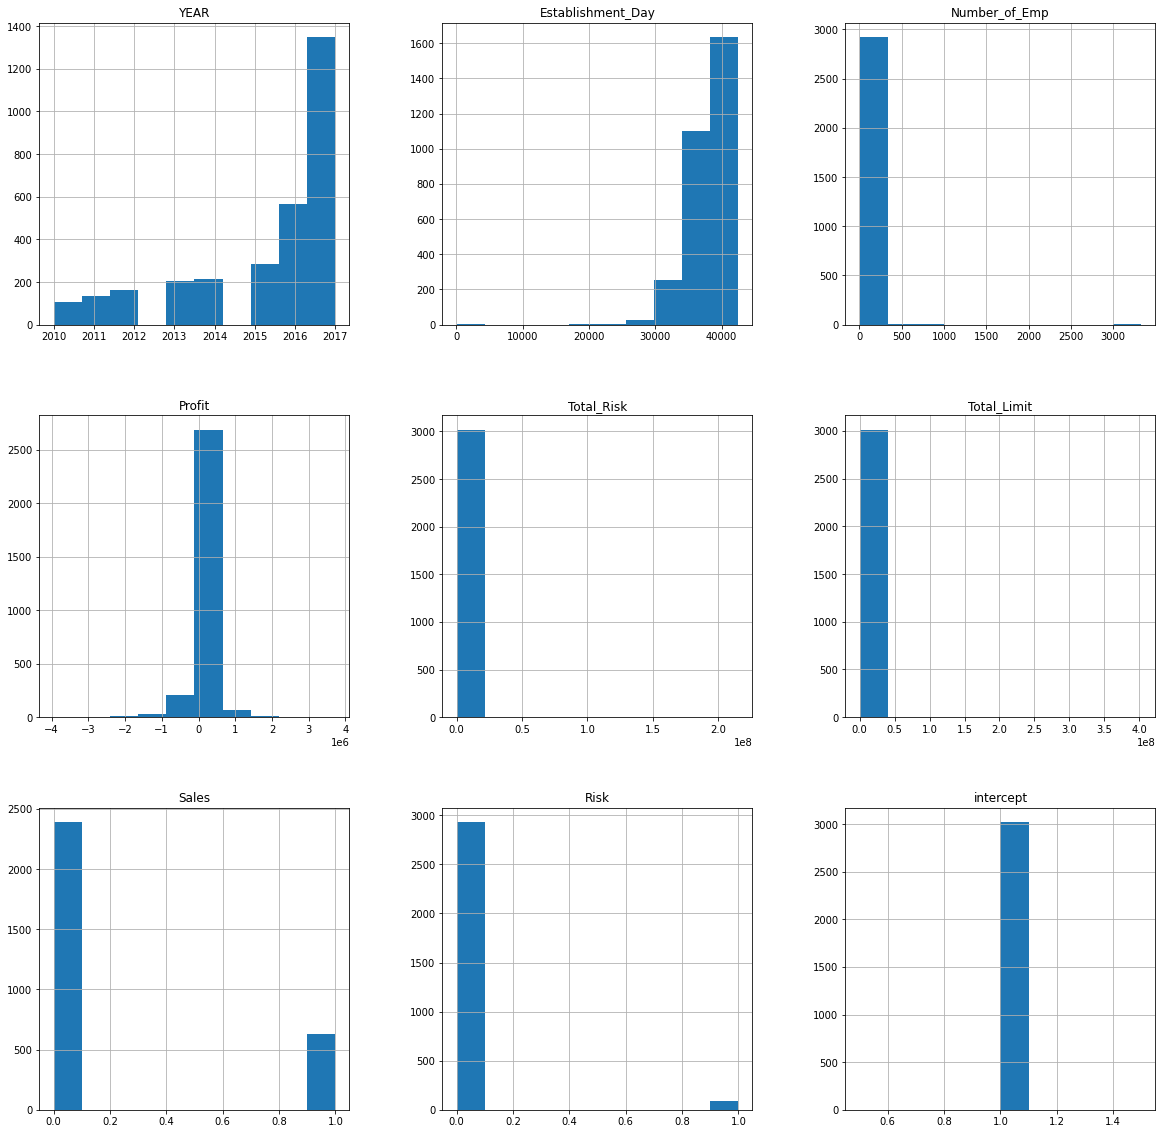

In [47]:
df_new.hist(figsize=(20, 20))

Especially 'Total_Risk', 'Number_of_Emp' and 'Total_Limit' columns have outstanding outlier values; because, we cannot observe meaningful distrubutions. Before starting a model, they need to be standardized.

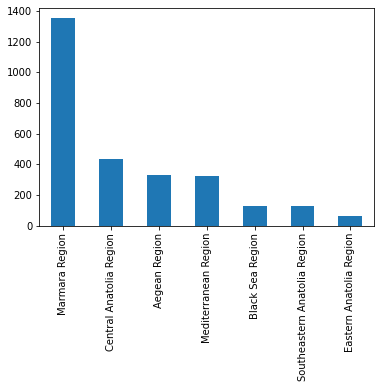

In [48]:
df_new.Region.value_counts().head(40).plot.bar()
plt.show()

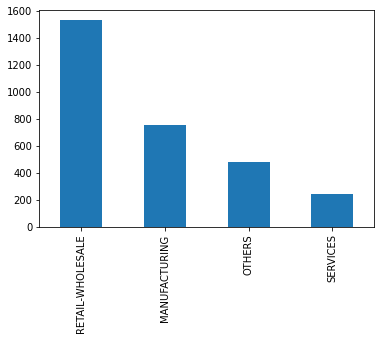

In [49]:
df_new.Sector.value_counts().head(40).plot.bar()
plt.show();

Like we have seen in the main dataset, companies are mostly operates on retail sector in Marmara region. Before starting a model, dummy features should be created before start predictive analysis. 

Text(0.5, 1.0, 'Correlation Map')

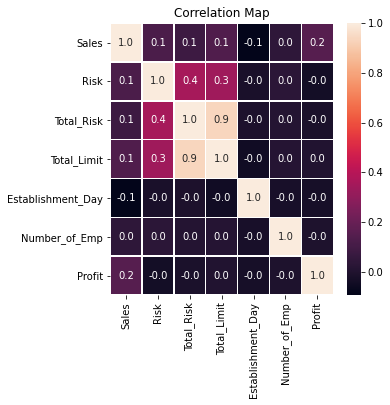

In [51]:
e,ea = plt.subplots(figsize=(5, 5))
sns.heatmap(df_new[['Sales', 'Risk',
                      'Total_Risk', 'Total_Limit', 
                      'Establishment_Day', 'Number_of_Emp', 
                      'Profit']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ea)
plt.title('Correlation Map')

* Sales feature has highest correlation with profit
* Sales has negative correlation only with customer tenure as we found out in the Question3
* Total Risk and Total Limit features are highly correlated with each other. Therefore, one of them should be selected on the final model

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, RATI1000EDC to RATI9996WER
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               3019 non-null   int64  
 1   Customer_num       3019 non-null   object 
 2   Establishment_Day  3019 non-null   int64  
 3   Number_of_Emp      2930 non-null   float64
 4   Profit             3019 non-null   float64
 5   Sector             3019 non-null   object 
 6   Region             2750 non-null   object 
 7   Total_Risk         3019 non-null   float64
 8   Total_Limit        3019 non-null   float64
 9   Sales              3019 non-null   int64  
 10  Risk               3019 non-null   int64  
 11  intercept          3019 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 386.6+ KB


Number_of_Employees and Region features have missing values, should be filled.

<a id='Question5'></a>
## Question5

What is your assumptions of your model?

First, binary logistic regression requires the dependent variable to be binary.

Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other. 

Fourth, logistic regression assumes linearity of independent variables and log odds.

Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10). 


<a id='Question6'></a>
## Question6

Which methods did you apply for modeling?

I will use logistic regression. Before diving into modelling, creation of dummy values, imputing of missing values, train-test splitting and standardization should be applied.

##### Categorical Value Treatment / Creating Dummy Variables

In [53]:
df_new.Sector.value_counts()

RETAIL-WHOLESALE    1532
MANUFACTURING        753
OTHERS               485
SERVICES             249
Name: Sector, dtype: int64

In [54]:
df_new[['Retail_flag',
          'Manuf_flag', 
          'Other_flag',
        'Serv_flag']] = pd.get_dummies(df_new['Sector'])[['RETAIL-WHOLESALE',
                                                               'MANUFACTURING',
                                                               'OTHERS',
                                                             'SERVICES']]

In [55]:
df_new.Region.value_counts()

Marmara Region                  1352
Central Anatolia Region          433
Aegean Region                    330
Mediterranean Region             322
Black Sea Region                 126
Southeastern Anatolia Region     125
Eastern Anatolia Region           62
Name: Region, dtype: int64

In [56]:
df_new[['marmara_flag',
          'central_anatolia_flag',
          'aegean_flag',
          'mediterranean_flag',
          'black_flag', 
          'southeastern-flag',
          'eastern-antolia-flag']] = pd.get_dummies(df_new['Region'])[['Marmara Region',
                                                               'Central Anatolia Region',
                                                               'Aegean Region',
                                                                'Mediterranean Region', 
                                                                'Black Sea Region', 
                                                                'Southeastern Anatolia Region',
                                                                'Eastern Anatolia Region']]

In [57]:
df_new.sample(5)

,YEAR,Customer_num,Establishment_Day,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales,Risk,intercept,Retail_flag,Manuf_flag,Other_flag,Serv_flag,marmara_flag,central_anatolia_flag,aegean_flag,mediterranean_flag,black_flag,southeastern-flag,eastern-antolia-flag
Customer_num,,,,,,,,,,,,,,,,,,,,,,,
RATI2806ITE,2017,RATI2806ITE,25217,17.0,44027.0,MANUFACTURING,Black Sea Region,71246.0,308938.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
RATI5397COH,2016,RATI5397COH,35640,2.0,34836.0,RETAIL-WHOLESALE,Central Anatolia Region,198346.0,1284134.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0
RATI6753TRZ,2016,RATI6753TRZ,41183,14.0,7829.0,MANUFACTURING,Marmara Region,212419.0,391817.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
RATI3896ZFJ,2010,RATI3896ZFJ,37288,NaN,63298.0,MANUFACTURING,Central Anatolia Region,212303.0,399144.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
RATI1744GHE,2017,RATI1744GHE,35086,10.0,-81377.0,RETAIL-WHOLESALE,Marmara Region,771196.0,1183066.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0


##### Missing Values

There are many ways to fill missing values, even one of them is using machine learning algorithms like PCA. However, to make it easy in this case, I prefer to impute the missed values with median of the column; because, there are outlier values in the dataset.

In [60]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median' )


Number_of_Emp = df_new.iloc[:,3:4].values
imputer = imputer.fit(Number_of_Emp)
Number_of_Emp = imputer.transform(Number_of_Emp)

# Converting numpy array to pandas dataframe
Number_of_Emp2 =pd.DataFrame(data = Number_of_Emp, index = range(3019), columns = ['Number_of_Emp_wo_missing'])
Number_of_Emp2.sample(4)

,Number_of_Emp_wo_missing
643,5.0
2847,41.0
1974,27.0
1088,12.0


In [61]:
# Reset indexing before joining dataframes

df_new = df_new.reset_index(drop=True)
df_new.sample()# Joining dataframes

,YEAR,Customer_num,Establishment_Day,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales,Risk,intercept,Retail_flag,Manuf_flag,Other_flag,Serv_flag,marmara_flag,central_anatolia_flag,aegean_flag,mediterranean_flag,black_flag,southeastern-flag,eastern-antolia-flag
163,2016,RATI1464ONS,35825,1.0,25044.0,RETAIL-WHOLESALE,Black Sea Region,7676225.0,11699047.0,0,1,1,1,0,0,0,0,0,0,0,1,0,0


In [62]:
# Join dataframes
df_new2 = pd.concat([df_new, Number_of_Emp2], axis=1)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      3019 non-null   int64  
 1   Customer_num              3019 non-null   object 
 2   Establishment_Day         3019 non-null   int64  
 3   Number_of_Emp             2930 non-null   float64
 4   Profit                    3019 non-null   float64
 5   Sector                    3019 non-null   object 
 6   Region                    2750 non-null   object 
 7   Total_Risk                3019 non-null   float64
 8   Total_Limit               3019 non-null   float64
 9   Sales                     3019 non-null   int64  
 10  Risk                      3019 non-null   int64  
 11  intercept                 3019 non-null   int64  
 12  Retail_flag               3019 non-null   uint8  
 13  Manuf_flag                3019 non-null   uint8  
 14  Other_fl

You can see from above table, there is no missing value in the Number of Employee column anymore.

In [63]:
df_new3 = df_new2.copy()

##### Train-Test Splitting

Dataset created %70 for train, %30 for test. 

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.
This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

I will drop below features because they are categorical and Machine Learning models can not process on categorical values.

In [64]:
df_new3.head()

,YEAR,Customer_num,Establishment_Day,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales,Risk,intercept,Retail_flag,Manuf_flag,Other_flag,Serv_flag,marmara_flag,central_anatolia_flag,aegean_flag,mediterranean_flag,black_flag,southeastern-flag,eastern-antolia-flag,Number_of_Emp_wo_missing
0,2016,RATI1000EDC,40206,13.0,39846.0,RETAIL-WHOLESALE,Marmara Region,38795.0,722891.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,13.0
1,2017,RATI1001HPF,33701,20.0,82182.0,OTHERS,Marmara Region,4603985.0,12112848.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20.0
2,2017,RATI1006ZUA,38138,20.0,39176.0,SERVICES,Central Anatolia Region,669969.0,3429846.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,20.0
3,2015,RATI1008FDC,40224,9.0,95724.0,RETAIL-WHOLESALE,Southeastern Anatolia Region,3288592.0,8237700.0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,9.0
4,2016,RATI1015EBB,36161,33.0,58446.0,MANUFACTURING,Marmara Region,216474.0,3325581.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,33.0


In [65]:
df_new3.drop(["YEAR","Customer_num", "Number_of_Emp", "Sector", "Region", "Sales" ], axis=1, inplace=True)

df_new3.head()

,Establishment_Day,Profit,Total_Risk,Total_Limit,Risk,intercept,Retail_flag,Manuf_flag,Other_flag,Serv_flag,marmara_flag,central_anatolia_flag,aegean_flag,mediterranean_flag,black_flag,southeastern-flag,eastern-antolia-flag,Number_of_Emp_wo_missing
0,40206,39846.0,38795.0,722891.0,0,1,1,0,0,0,1,0,0,0,0,0,0,13.0
1,33701,82182.0,4603985.0,12112848.0,0,1,0,0,1,0,1,0,0,0,0,0,0,20.0
2,38138,39176.0,669969.0,3429846.0,0,1,0,0,0,1,0,1,0,0,0,0,0,20.0
3,40224,95724.0,3288592.0,8237700.0,0,1,1,0,0,0,0,0,0,0,0,1,0,9.0
4,36161,58446.0,216474.0,3325581.0,0,1,0,1,0,0,1,0,0,0,0,0,0,33.0


In [66]:
X = df_new3.values#independent variables
y = df_new2["Sales"].values #dependent variable

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

#### Standardization 

Calculating the features how much standard deviation away from the mean.

Data Standardization deals with transforming the data that was acquired in different formats to a standard format. Data standardization is often used to correct and harmonize data, but it is also an important prerequisite when performing a deduplication of data.

In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Fitting Logistic Regression

In [68]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred2 = logreg.predict(X_train)

<a id='Question7'></a>
## Question7

What is your model result? How do you measure performance of your model?

Our aim to find out the clients which have higher than 5 million ₺ net sales. This is classification problem and Classification problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these types of problems.

I used below Classification metrics: 

* Classification Accuracy
* Log Loss
* Area Under ROC Curve
* Confusion Matrix
* Classification Report

There are many performance metrics calcuted from confusion matrix. However, in our case, it is important to find overall accuracy value which indicates that how algortihm estimated both goods and bads and sensitivity value which shows that how good the algorithm is estimating the bads (true positive recognition rate). Last but not least, it is also important to see recall value which indicates that how algoritmn performs good while predicting the bad.

            event			    no-event
- event		true positive		false positive
- no-event	false negative		true negative


“true positive” for correctly predicted event values.
“false positive” for incorrectly predicted event values.
“true negative” for correctly predicted no-event values.
“false negative” for incorrectly predicted no-event values.


- Classification accuracy is the ratio of correct predictions to total predictions made.
classification accuracy = correct predictions / total predictions

- It is often presented as a percentage by multiplying the result by 100.
classification accuracy = correct predictions / total predictions * 100

- Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value, such as:
error rate = (1 - (correct predictions / total predictions)) * 100

In [69]:
cm_train = confusion_matrix(y_train,y_pred2)
cm_train

array([[1630,   50],
       [ 358,   75]])

In [74]:
cm_test = confusion_matrix(y_test,y_pred)
cm_test

array([[675,  33],
       [153,  45]])

**Standardized equations**
* sensitivity = recall = tp / t = tp / (tp + fn)
* specificity = tn / n = tn / (tn + fp)
* precision = tp / p = tp / (tp + fp)


In [72]:
train_accuracy = accuracy_score(y_train,y_pred2)
test_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy value on the train dataset: {}" . format(train_accuracy))
print("Accuracy value on the test dataset: {}" . format(test_accuracy))

Accuracy value on the train dataset: 0.8069096071935636
Accuracy value on the test dataset: 0.7947019867549668


There is stable performances on both train and test datasets. Model is classifing %79 correct both goods and bads.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

In [78]:
Sensitivity_train = cm_train[0][0]/(cm_train[0][0]+cm_train[0][1])
Sensitivity_test = cm_test[0][0]/(cm_test[0][0]+cm_test[0][1])

print("Sensitivity/Recall value on the train dataset: {}" . format(Sensitivity_train))
print("Sensitivity/Recall value on the test dataset: {}" . format(Sensitivity_test))

Sensitivity value on the train dataset: 0.9702380952380952
Sensitivity value on the test dataset: 0.9533898305084746


Model captures %97 of bads correctly.

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

In [79]:
precision_train = cm_train[0][0]/(cm_train[0][0]+cm_train[1][0])
precision_test = cm_test[0][0]/(cm_test[0][0]+cm_test[1][0])

print("Precision value on the train dataset: {}" . format(precision_train))
print("Precision value on the test dataset: {}" . format(precision_test))

Precision value on the train dataset: 0.8199195171026157
Precision value on the test dataset: 0.8152173913043478


81 % of the positively classified were relevant. 

**Classification Accuracy**

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

Below is an example of calculating classification accuracy. Giving an accuracy score of approximately 77% accurate.

In [83]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.792 (0.025)


**Log Loss**

Logistic loss (or log loss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.
Smaller log loss is better with 0 representing a perfect log loss.

In [85]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(logreg, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.480 (0.036)


Area Under ROC Curve

Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

You can see the the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions.

In [86]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(logreg, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.762 (0.024)


**Classification Report**

Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The classification_report() function displays the precision, recall, f1-score and support for each class.

The example below demonstrates the report on the binary classification problem.

You can see good precisionn and recall for the algorithm.

In [82]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       708
           1       0.58      0.23      0.33       198

    accuracy                           0.79       906
   macro avg       0.70      0.59      0.60       906
weighted avg       0.76      0.79      0.76       906

